In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Downloads\FinalCustomer1.csv")

In [3]:
data.head()

,pid,marital_status,no_of_dependents,policy_in_force_date,expiry_date,policy_issue_state,location,gender,insured_zip,insured_education,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,premium,renew_offer_type,current_status
0,251094,divorced,0,10/6/2007,4/6/2008,Oregon,Urban,m,442727,associate,...,9,11,0,2,four_door,small,online,274.19,offer1,cancelled
1,124551,single,1,12/31/2011,6/30/2012,California,rural,f,465361,associate,...,32,9,0,8,two_door,suv,online,143.41,offer1,active
2,424601,unmarried,4,5/28/2010,11/28/2010,Nevada,rural,m,433864,PhD,...,4,21,0,1,two_door,small,online,187.96,offer1,active
3,251557,divorced,0,5/16/2006,11/16/2006,California,rural,f,456471,High School,...,13,47,1,1,four_door,small,online,178.76,offer1,active
4,279127,married,0,9/13/2011,3/13/2012,washington,Urban,f,605697,PhD,...,24,22,0,4,two_door,suv,online,132.01,offer2,cancelled


In [4]:
data.dtypes

pid                               int64
marital_status                   object
no_of_dependents                  int64
policy_in_force_date             object
expiry_date                      object
policy_issue_state               object
location                         object
gender                           object
insured_zip                      object
insured_education                object
insured_occupation               object
income                           object
coverage                         object
past_insurance_claims             int64
previous_insurar                 object
current_insurar                  object
incident_type                    object
policy_type                      object
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
vehicle_class                    object
vehicle_size                     object
sales_channel                    object


In [5]:
data.columns


Index(['pid', 'marital_status', 'no_of_dependents', 'policy_in_force_date',
       'expiry_date', 'policy_issue_state', 'location', 'gender',
       'insured_zip', 'insured_education', 'insured_occupation', 'income',
       'coverage', 'past_insurance_claims', 'previous_insurar',
       'current_insurar', 'incident_type', 'policy_type',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'vehicle_class',
       'vehicle_size', 'sales_channel', 'premium', 'renew_offer_type',
       'current_status'],
      dtype='object')

In [6]:
data.shape

(5000, 28)

In [7]:
data.nunique()

pid                              4970
marital_status                      5
no_of_dependents                    5
policy_in_force_date             3221
expiry_date                      3171
policy_issue_state                  5
location                            3
gender                              3
insured_zip                      4840
insured_education                   6
insured_occupation                  8
income                           4968
coverage                            3
past_insurance_claims               3
previous_insurar                    4
current_insurar                     1
incident_type                       4
policy_type                         2
months_since_last_claim            34
months_since_policy_inception      93
number_of_open_complaints           5
number_of_policies                 10
vehicle_class                       2
vehicle_size                        3
sales_channel                       2
premium                          4489
renew_offer_

In [8]:
data.marital_status.unique()

array(['divorced', 'single', 'unmarried', 'married', 'Single'],
      dtype=object)

In [9]:
data.loc[data.marital_status=="Single",'marital_status'] = "single"

In [10]:
data.marital_status.unique()

array(['divorced', 'single', 'unmarried', 'married'], dtype=object)

In [11]:
data.isna().sum()

pid                              0
marital_status                   0
no_of_dependents                 0
policy_in_force_date             0
expiry_date                      0
policy_issue_state               0
location                         0
gender                           0
insured_zip                      0
insured_education                0
insured_occupation               0
income                           0
coverage                         0
past_insurance_claims            0
previous_insurar                 0
current_insurar                  0
incident_type                    0
policy_type                      0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
vehicle_class                    0
vehicle_size                     0
sales_channel                    0
premium                          0
renew_offer_type                 0
current_status                   0
dtype: int64

In [12]:
data.isin(['?']).sum()

pid                               0
marital_status                    0
no_of_dependents                  0
policy_in_force_date              0
expiry_date                       0
policy_issue_state                0
location                          0
gender                            1
insured_zip                      30
insured_education                 0
insured_occupation                0
income                           32
coverage                          0
past_insurance_claims             0
previous_insurar                  0
current_insurar                   0
incident_type                     0
policy_type                       0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
vehicle_class                     0
vehicle_size                      0
sales_channel                     0
premium                          22
renew_offer_type                  0
current_status              

In [13]:
data['current_status'].value_counts()

cancelled    3125
active       1858
?              17
Name: current_status, dtype: int64

In [14]:
 data=data[data.current_status!='?'] # Removing all records which has current_status as ?

In [15]:
data.current_status.value_counts()

cancelled    3125
active       1858
Name: current_status, dtype: int64

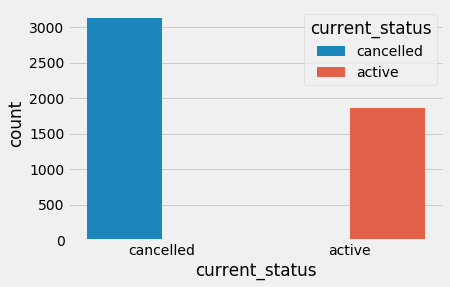

In [16]:
plt.style.use('fivethirtyeight')
ax =sb.countplot(x='current_status', data=data, hue='current_status')

In [17]:
data.gender.value_counts()

m    2696
f    2286
?       1
Name: gender, dtype: int64

In [18]:
data=data[data.gender!='?']

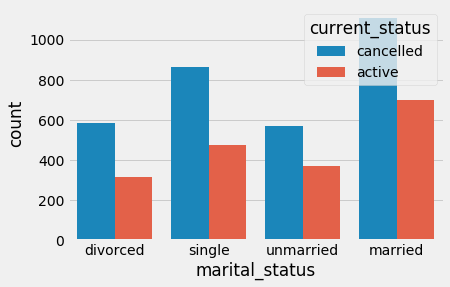

In [21]:
plt.style.use('fivethirtyeight')
ax =sb.countplot(x='marital_status', data=data, hue='current_status')

In [31]:
# plt.style.use('fivethirtyeight')
# fig = plt.figure(figsize=(10,6))
# ax = data.groupby('premium').no_of_dependents.count().plot.bar(ylim=0)
# # ax.set_ylabel('Fraud reported')
# plt.show()

In [29]:
# data.hist(column="premium", by="no_of_dependents",bins=10)

In [36]:
# plt.style.use('fivethirtyeight')
# ax =sb.countplot(x='premium',data=data, hue='no_of_dependents')


In [52]:
data[['premium']]=data[['premium']].apply(pd.to_numeric) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6D58AF848>,
      dtype=object)

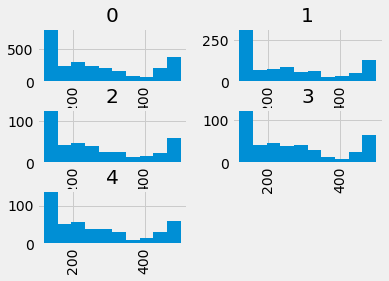

In [64]:
# fig, axes = plt.subplots(nrows=5,sharex=True, sharey=True)
data.hist(column="premium",by="no_of_dependents")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6D1C5A488>,
      dtype=object)

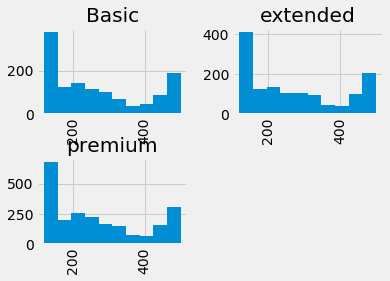

In [67]:
data.hist(column="premium",by="coverage")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 28 columns):
pid                              4982 non-null int64
marital_status                   4982 non-null object
no_of_dependents                 4982 non-null int64
policy_in_force_date             4982 non-null object
expiry_date                      4982 non-null object
policy_issue_state               4982 non-null object
location                         4982 non-null object
gender                           4982 non-null object
insured_zip                      4982 non-null object
insured_education                4982 non-null object
insured_occupation               4982 non-null object
income                           4982 non-null object
coverage                         4982 non-null object
past_insurance_claims            4982 non-null int64
previous_insurar                 4982 non-null object
current_insurar                  4982 non-null object
incident_type                   

In [46]:
data.isin(['?']).sum()

pid                               0
marital_status                    0
no_of_dependents                  0
policy_in_force_date              0
expiry_date                       0
policy_issue_state                0
location                          0
gender                            0
insured_zip                      30
insured_education                 0
insured_occupation                0
income                           32
coverage                          0
past_insurance_claims             0
previous_insurar                  0
current_insurar                   0
incident_type                     0
policy_type                       0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
vehicle_class                     0
vehicle_size                      0
sales_channel                     0
premium                          22
renew_offer_type                  0
current_status              

In [47]:
data.replace('?',np.nan,inplace=True)

In [48]:
data.isna().sum()

pid                               0
marital_status                    0
no_of_dependents                  0
policy_in_force_date              0
expiry_date                       0
policy_issue_state                0
location                          0
gender                            0
insured_zip                      30
insured_education                 0
insured_occupation                0
income                           32
coverage                          0
past_insurance_claims             0
previous_insurar                  0
current_insurar                   0
incident_type                     0
policy_type                       0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
vehicle_class                     0
vehicle_size                      0
sales_channel                     0
premium                          22
renew_offer_type                  0
current_status              

In [49]:
data[['no_of_dependents', 'income','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','premium']] = data[['no_of_dependents', 'income','months_since_last_claim',
                                                                   'months_since_policy_inception','number_of_open_complaints','number_of_policies','premium']].apply(pd.to_numeric) 

In [50]:
data.describe()

,pid,no_of_dependents,income,past_insurance_claims,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,premium
count,4982.000000,4982.000000,4950.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4960.000000
mean,300276.928944,0.999197,95204.388514,0.730430,11.093737,27.198113,0.367523,2.138097,269.183635
std,115913.243030,1.358164,44399.008774,0.741812,8.702392,25.248667,0.646530,2.419679,126.988363
min,100053.000000,0.000000,21042.914000,0.000000,0.000000,2.000000,0.000000,0.000000,120.040000
25%,198353.000000,0.000000,63648.449500,0.000000,2.000000,6.000000,0.000000,1.000000,147.710000
50%,301051.500000,0.000000,90511.456500,1.000000,12.000000,17.000000,0.000000,1.000000,235.215000
75%,400110.250000,2.000000,115874.613500,1.000000,17.000000,45.000000,1.000000,3.000000,375.445000
max,499955.000000,4.000000,219768.103000,2.000000,33.000000,94.000000,4.000000,9.000000,499.890000


In [69]:
q=data['income'].quantile(0.95)
q

190823.86920000002

In [70]:
mean_income =data['income'].mean()

In [71]:
data['income'].fillna(mean_income,inplace=True)

In [72]:
mean_premium =data['premium'].mean()

In [73]:
data['premium'].fillna(mean_premium,inplace=True)

In [74]:
data.describe()

,pid,no_of_dependents,income,past_insurance_claims,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,premium
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,300276.928944,0.999197,95204.388514,0.730430,11.093737,27.198113,0.367523,2.138097,269.183635
std,115913.243030,1.358164,44256.160195,0.741812,8.702392,25.248667,0.646530,2.419679,126.707613
min,100053.000000,0.000000,21042.914000,0.000000,0.000000,2.000000,0.000000,0.000000,120.040000
25%,198353.000000,0.000000,63793.544750,0.000000,2.000000,6.000000,0.000000,1.000000,147.770000
50%,301051.500000,0.000000,90914.571500,1.000000,12.000000,17.000000,0.000000,1.000000,236.070000
75%,400110.250000,2.000000,115765.744500,1.000000,17.000000,45.000000,1.000000,3.000000,373.640000
max,499955.000000,4.000000,219768.103000,2.000000,33.000000,94.000000,4.000000,9.000000,499.890000


In [75]:
data[['premium']]=data[['premium']].apply(pd.to_numeric) 

In [30]:
data.isna().sum()

pid                               0
marital_status                    0
no_of_dependents                  0
policy_in_force_date              0
expiry_date                       0
policy_issue_state                0
location                          0
gender                            0
insured_zip                      30
insured_education                 0
insured_occupation                0
income                            0
coverage                          0
past_insurance_claims             0
previous_insurar                  0
current_insurar                   0
incident_type                     0
policy_type                       0
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
vehicle_class                     0
vehicle_size                      0
sales_channel                     0
premium                           0
renew_offer_type                  0
current_status              

In [31]:
data.drop(['insured_zip'],inplace=True,axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 27 columns):
pid                              4982 non-null int64
marital_status                   4982 non-null object
no_of_dependents                 4982 non-null int64
policy_in_force_date             4982 non-null object
expiry_date                      4982 non-null object
policy_issue_state               4982 non-null object
location                         4982 non-null object
gender                           4982 non-null object
insured_education                4982 non-null object
insured_occupation               4982 non-null object
income                           4982 non-null float64
coverage                         4982 non-null object
past_insurance_claims            4982 non-null int64
previous_insurar                 4982 non-null object
current_insurar                  4982 non-null object
incident_type                    4982 non-null object
policy_type                    

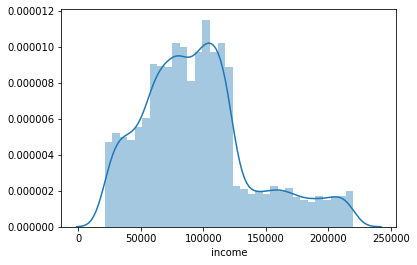

In [33]:
sb.distplot(data['income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB14F5748>]],
      dtype=object)

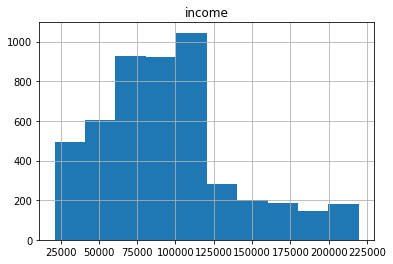

In [34]:
data.hist(column="income", bins=10)

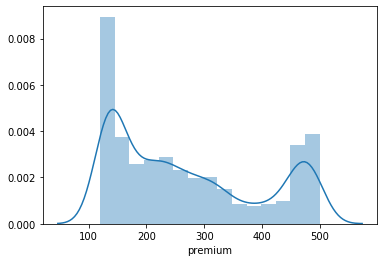

In [35]:
sb.distplot(data['premium'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB15B7508>]],
      dtype=object)

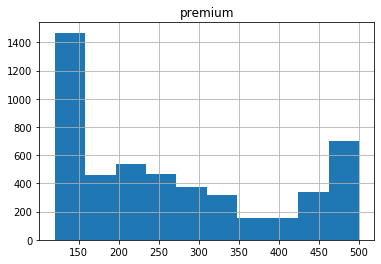

In [36]:
data.hist(column="premium", bins=10)

In [37]:
data.select_dtypes(include=['object']).columns

Index(['marital_status', 'policy_in_force_date', 'expiry_date',
       'policy_issue_state', 'location', 'gender', 'insured_education',
       'insured_occupation', 'coverage', 'previous_insurar', 'current_insurar',
       'incident_type', 'policy_type', 'vehicle_class', 'vehicle_size',
       'sales_channel', 'renew_offer_type', 'current_status'],
      dtype='object')

In [38]:
sqrt_premium=np.sqrt(data['premium'])
data['sqrt_premium']=sqrt_premium

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB1273388>]],
      dtype=object)

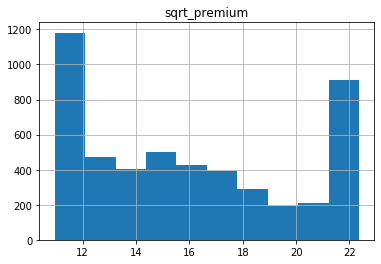

In [39]:
data.hist(column="sqrt_premium", bins=10)

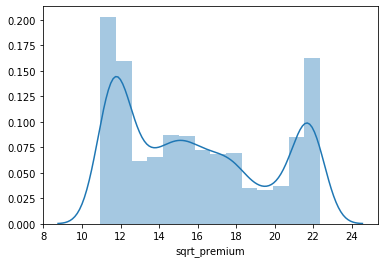

In [40]:
sb.distplot(data['sqrt_premium'])

In [41]:
log_premium=np.log(data['premium'])
data['log_premium']=log_premium

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB1731F48>]],
      dtype=object)

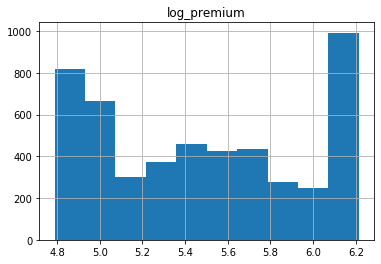

In [42]:
data.hist(column="log_premium", bins=10)

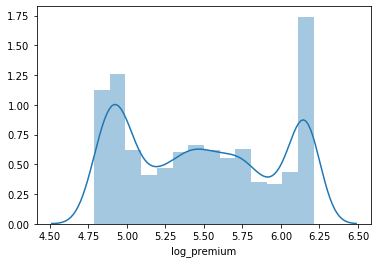

In [43]:
sb.distplot(data['log_premium'])

In [44]:
data.describe()

,pid,no_of_dependents,income,past_insurance_claims,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,premium,sqrt_premium,log_premium
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,300276.928944,0.999197,95204.388514,0.730430,11.093737,27.198113,0.367523,2.138097,269.183635,15.960178,5.483885
std,115913.243030,1.358164,44256.160195,0.741812,8.702392,25.248667,0.646530,2.419679,126.707613,3.802532,0.473926
min,100053.000000,0.000000,21042.914000,0.000000,0.000000,2.000000,0.000000,0.000000,120.040000,10.956277,4.787825
25%,198353.000000,0.000000,63793.544750,0.000000,2.000000,6.000000,0.000000,1.000000,147.770000,12.156068,4.995657
50%,301051.500000,0.000000,90914.571500,1.000000,12.000000,17.000000,0.000000,1.000000,236.070000,15.364570,5.464128
75%,400110.250000,2.000000,115765.744500,1.000000,17.000000,45.000000,1.000000,3.000000,373.640000,19.329770,5.923293
max,499955.000000,4.000000,219768.103000,2.000000,33.000000,94.000000,4.000000,9.000000,499.890000,22.358220,6.214388


In [45]:
data['current_status'].replace(to_replace='active', value=1, inplace=True)
data['current_status'].replace(to_replace='cancelled',  value=0, inplace=True)

data


,pid,marital_status,no_of_dependents,policy_in_force_date,expiry_date,policy_issue_state,location,gender,insured_education,insured_occupation,...,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,premium,renew_offer_type,current_status,sqrt_premium,log_premium
0,251094,divorced,0,10/6/2007,4/6/2008,Oregon,Urban,m,associate,tech-support,...,0,2,four_door,small,online,274.19,offer1,0,16.558684,5.613821
1,124551,single,1,12/31/2011,6/30/2012,California,rural,f,associate,tech-support,...,0,8,two_door,suv,online,143.41,offer1,1,11.975391,4.965708
2,424601,unmarried,4,5/28/2010,11/28/2010,Nevada,rural,m,PhD,tech-support,...,0,1,two_door,small,online,187.96,offer1,1,13.709850,5.236229
3,251557,divorced,0,5/16/2006,11/16/2006,California,rural,f,High School,doctor,...,1,1,four_door,small,online,178.76,offer1,1,13.370116,5.186044
4,279127,married,0,9/13/2011,3/13/2012,washington,Urban,f,PhD,exec-managerial,...,0,4,two_door,suv,online,132.01,offer2,0,11.489560,4.882878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,462612,single,1,6/24/2004,12/24/2004,Oregon,suburban,m,Masters,exec-managerial,...,1,8,four_door,small,online,139.13,offer1,0,11.795338,4.935409
4996,272897,married,0,4/16/2006,10/16/2006,Arizona,Urban,m,PhD,sales,...,0,0,four_door,small,agent,145.65,offer2,0,12.068554,4.981206
4997,395061,married,1,5/31/2012,11/30/2012,Arizona,Urban,f,MD,armed-forces,...,0,0,two_door,small,online,218.66,offer2,0,14.787157,5.387518
4998,137524,unmarried,0,1/17/2002,7/17/2002,Nevada,rural,m,Associate,priv-house-serv,...,0,0,four_door,suv,agent,235.14,offer2,0,15.334275,5.460181


In [46]:
data.head(10)

,pid,marital_status,no_of_dependents,policy_in_force_date,expiry_date,policy_issue_state,location,gender,insured_education,insured_occupation,...,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,premium,renew_offer_type,current_status,sqrt_premium,log_premium
0,251094,divorced,0,10/6/2007,4/6/2008,Oregon,Urban,m,associate,tech-support,...,0,2,four_door,small,online,274.19,offer1,0,16.558684,5.613821
1,124551,single,1,12/31/2011,6/30/2012,California,rural,f,associate,tech-support,...,0,8,two_door,suv,online,143.41,offer1,1,11.975391,4.965708
2,424601,unmarried,4,5/28/2010,11/28/2010,Nevada,rural,m,PhD,tech-support,...,0,1,two_door,small,online,187.96,offer1,1,13.709850,5.236229
3,251557,divorced,0,5/16/2006,11/16/2006,California,rural,f,High School,doctor,...,1,1,four_door,small,online,178.76,offer1,1,13.370116,5.186044
4,279127,married,0,9/13/2011,3/13/2012,washington,Urban,f,PhD,exec-managerial,...,0,4,two_door,suv,online,132.01,offer2,0,11.489560,4.882878
5,154428,married,2,7/8/2009,1/8/2010,Oregon,rural,m,PhD,tech-support,...,0,0,two_door,mid_size,agent,134.13,offer2,0,11.581451,4.898809
6,210058,single,0,6/26/2003,12/26/2003,Nevada,Urban,m,PhD,tech-support,...,2,0,four_door,mid_size,online,459.74,offer2,0,21.441548,6.130661
7,451823,unmarried,1,10/13/2010,4/13/2011,California,rural,f,High School,exec-managerial,...,0,1,two_door,small,agent,276.84,offer2,0,16.638510,5.623440
8,223718,married,3,4/22/2008,10/22/2008,Nevada,suburban,f,High School,tech-support,...,0,0,four_door,mid_size,agent,474.22,offer2,0,21.776593,6.161671
9,300944,single,0,9/4/2007,3/4/2008,California,rural,f,PhD,tech-support,...,0,3,four_door,suv,agent,401.35,offer2,1,20.033722,5.994834


In [47]:
types=pd.DataFrame(data.dtypes)
unique=pd.DataFrame(data.nunique())

In [48]:
pd.value_counts(data["current_status"])

0    3124
1    1858
Name: current_status, dtype: int64

In [49]:
types

,0
pid,int64
marital_status,object
no_of_dependents,int64
policy_in_force_date,object
expiry_date,object
policy_issue_state,object
location,object
gender,object
insured_education,object
insured_occupation,object


In [50]:
unique

,0
pid,4952
marital_status,4
no_of_dependents,5
policy_in_force_date,3211
expiry_date,3161
policy_issue_state,5
location,3
gender,2
insured_education,6
insured_occupation,8


In [51]:
new=pd.concat([types,unique],axis=1)

In [52]:
new

,0,0
pid,int64,4952
marital_status,object,4
no_of_dependents,int64,5
policy_in_force_date,object,3211
expiry_date,object,3161
policy_issue_state,object,5
location,object,3
gender,object,2
insured_education,object,6
insured_occupation,object,8


In [53]:
data.no_of_dependents.value_counts()

0    2730
1     915
4     477
3     435
2     425
Name: no_of_dependents, dtype: int64

In [54]:
data.no_of_dependents = data.no_of_dependents.astype('str')
data.past_insurance_claims = data.past_insurance_claims.astype('str')
data.number_of_open_complaints = data.number_of_open_complaints.astype('str')
data.number_of_policies = data.number_of_policies.astype('str')

In [55]:
data.past_insurance_claims.value_counts()

0    2223
1    1879
2     880
Name: past_insurance_claims, dtype: int64

In [56]:
data.number_of_open_complaints.value_counts()

0    3605
1     929
2     444
4       2
3       2
Name: number_of_open_complaints, dtype: int64

In [57]:
data.number_of_policies.value_counts()

1    1605
0    1204
2     923
3     245
8     225
4     195
7     176
6     153
5     142
9     114
Name: number_of_policies, dtype: int64

In [58]:
data.select_dtypes(include=['object']).columns 

Index(['marital_status', 'no_of_dependents', 'policy_in_force_date',
       'expiry_date', 'policy_issue_state', 'location', 'gender',
       'insured_education', 'insured_occupation', 'coverage',
       'past_insurance_claims', 'previous_insurar', 'current_insurar',
       'incident_type', 'policy_type', 'number_of_open_complaints',
       'number_of_policies', 'vehicle_class', 'vehicle_size', 'sales_channel',
       'renew_offer_type'],
      dtype='object')

In [59]:
data.drop(["log_premium","sqrt_premium"],axis=1,inplace=True)

In [60]:
data.head()

,pid,marital_status,no_of_dependents,policy_in_force_date,expiry_date,policy_issue_state,location,gender,insured_education,insured_occupation,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,premium,renew_offer_type,current_status
0,251094,divorced,0,10/6/2007,4/6/2008,Oregon,Urban,m,associate,tech-support,...,9,11,0,2,four_door,small,online,274.19,offer1,0
1,124551,single,1,12/31/2011,6/30/2012,California,rural,f,associate,tech-support,...,32,9,0,8,two_door,suv,online,143.41,offer1,1
2,424601,unmarried,4,5/28/2010,11/28/2010,Nevada,rural,m,PhD,tech-support,...,4,21,0,1,two_door,small,online,187.96,offer1,1
3,251557,divorced,0,5/16/2006,11/16/2006,California,rural,f,High School,doctor,...,13,47,1,1,four_door,small,online,178.76,offer1,1
4,279127,married,0,9/13/2011,3/13/2012,washington,Urban,f,PhD,exec-managerial,...,24,22,0,4,two_door,suv,online,132.01,offer2,0


In [61]:
data.isna().sum()

pid                              0
marital_status                   0
no_of_dependents                 0
policy_in_force_date             0
expiry_date                      0
policy_issue_state               0
location                         0
gender                           0
insured_education                0
insured_occupation               0
income                           0
coverage                         0
past_insurance_claims            0
previous_insurar                 0
current_insurar                  0
incident_type                    0
policy_type                      0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
vehicle_class                    0
vehicle_size                     0
sales_channel                    0
premium                          0
renew_offer_type                 0
current_status                   0
dtype: int64

In [62]:
data._get_numeric_data().columns

Index(['pid', 'income', 'months_since_last_claim',
       'months_since_policy_inception', 'premium', 'current_status'],
      dtype='object')

In [63]:
data._get_numeric_data().head()

,pid,income,months_since_last_claim,months_since_policy_inception,premium,current_status
0,251094,43958.028,9,11,274.19,0
1,124551,165226.840,32,9,143.41,1
2,424601,110685.503,4,21,187.96,1
3,251557,167934.968,13,47,178.76,1
4,279127,66192.293,24,22,132.01,0


In [64]:
data.select_dtypes(include=['object']).columns

Index(['marital_status', 'no_of_dependents', 'policy_in_force_date',
       'expiry_date', 'policy_issue_state', 'location', 'gender',
       'insured_education', 'insured_occupation', 'coverage',
       'past_insurance_claims', 'previous_insurar', 'current_insurar',
       'incident_type', 'policy_type', 'number_of_open_complaints',
       'number_of_policies', 'vehicle_class', 'vehicle_size', 'sales_channel',
       'renew_offer_type'],
      dtype='object')

In [65]:
data.select_dtypes(include=['object']).head()

,marital_status,no_of_dependents,policy_in_force_date,expiry_date,policy_issue_state,location,gender,insured_education,insured_occupation,coverage,...,previous_insurar,current_insurar,incident_type,policy_type,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,renew_offer_type
0,divorced,0,10/6/2007,4/6/2008,Oregon,Urban,m,associate,tech-support,premium,...,allstate,Mercury insurance,single-vehicle collision,personal auto,0,2,four_door,small,online,offer1
1,single,1,12/31/2011,6/30/2012,California,rural,f,associate,tech-support,premium,...,usaa,Mercury insurance,Multi-vehicle Collision,corporate auto,0,8,two_door,suv,online,offer1
2,unmarried,4,5/28/2010,11/28/2010,Nevada,rural,m,PhD,tech-support,Basic,...,libertymutual,Mercury insurance,single-vehicle collision,corporate auto,0,1,two_door,small,online,offer1
3,divorced,0,5/16/2006,11/16/2006,California,rural,f,High School,doctor,Basic,...,progressive,Mercury insurance,Parked Car,corporate auto,1,1,four_door,small,online,offer1
4,married,0,9/13/2011,3/13/2012,washington,Urban,f,PhD,exec-managerial,premium,...,allstate,Mercury insurance,Vehicle Theft,personal auto,0,4,two_door,suv,online,offer2


In [66]:
data = data.drop(columns = [
    'pid', 
    'policy_in_force_date', 
    'expiry_date', 
    'current_insurar',
    ])


In [67]:
data

,marital_status,no_of_dependents,policy_issue_state,location,gender,insured_education,insured_occupation,income,coverage,past_insurance_claims,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,sales_channel,premium,renew_offer_type,current_status
0,divorced,0,Oregon,Urban,m,associate,tech-support,43958.028,premium,1,...,9,11,0,2,four_door,small,online,274.19,offer1,0
1,single,1,California,rural,f,associate,tech-support,165226.840,premium,0,...,32,9,0,8,two_door,suv,online,143.41,offer1,1
2,unmarried,4,Nevada,rural,m,PhD,tech-support,110685.503,Basic,1,...,4,21,0,1,two_door,small,online,187.96,offer1,1
3,divorced,0,California,rural,f,High School,doctor,167934.968,Basic,0,...,13,47,1,1,four_door,small,online,178.76,offer1,1
4,married,0,washington,Urban,f,PhD,exec-managerial,66192.293,premium,1,...,24,22,0,4,two_door,suv,online,132.01,offer2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,single,1,Oregon,suburban,m,Masters,exec-managerial,86875.533,Basic,0,...,21,4,1,8,four_door,small,online,139.13,offer1,0
4996,married,0,Arizona,Urban,m,PhD,sales,212441.437,premium,1,...,0,16,0,0,four_door,small,agent,145.65,offer2,0
4997,married,1,Arizona,Urban,f,MD,armed-forces,79622.286,premium,2,...,10,93,0,0,two_door,small,online,218.66,offer2,0
4998,unmarried,0,Nevada,rural,m,Associate,priv-house-serv,165751.739,Basic,1,...,0,47,0,0,four_door,suv,agent,235.14,offer2,0


In [68]:
data._get_numeric_data().head()

,income,months_since_last_claim,months_since_policy_inception,premium,current_status
0,43958.028,9,11,274.19,0
1,165226.840,32,9,143.41,1
2,110685.503,4,21,187.96,1
3,167934.968,13,47,178.76,1
4,66192.293,24,22,132.01,0


In [69]:
data.select_dtypes(include=['object']).columns

Index(['marital_status', 'no_of_dependents', 'policy_issue_state', 'location',
       'gender', 'insured_education', 'insured_occupation', 'coverage',
       'past_insurance_claims', 'previous_insurar', 'incident_type',
       'policy_type', 'number_of_open_complaints', 'number_of_policies',
       'vehicle_class', 'vehicle_size', 'sales_channel', 'renew_offer_type'],
      dtype='object')

In [70]:
data.location.value_counts()

suburban    2236
rural       1394
Urban       1352
Name: location, dtype: int64

In [71]:
data.policy_issue_state.value_counts()

California    1839
Nevada         934
Arizona        910
Oregon         868
washington     431
Name: policy_issue_state, dtype: int64

C:\Users\gagan.shetty\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gagan.shetty\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


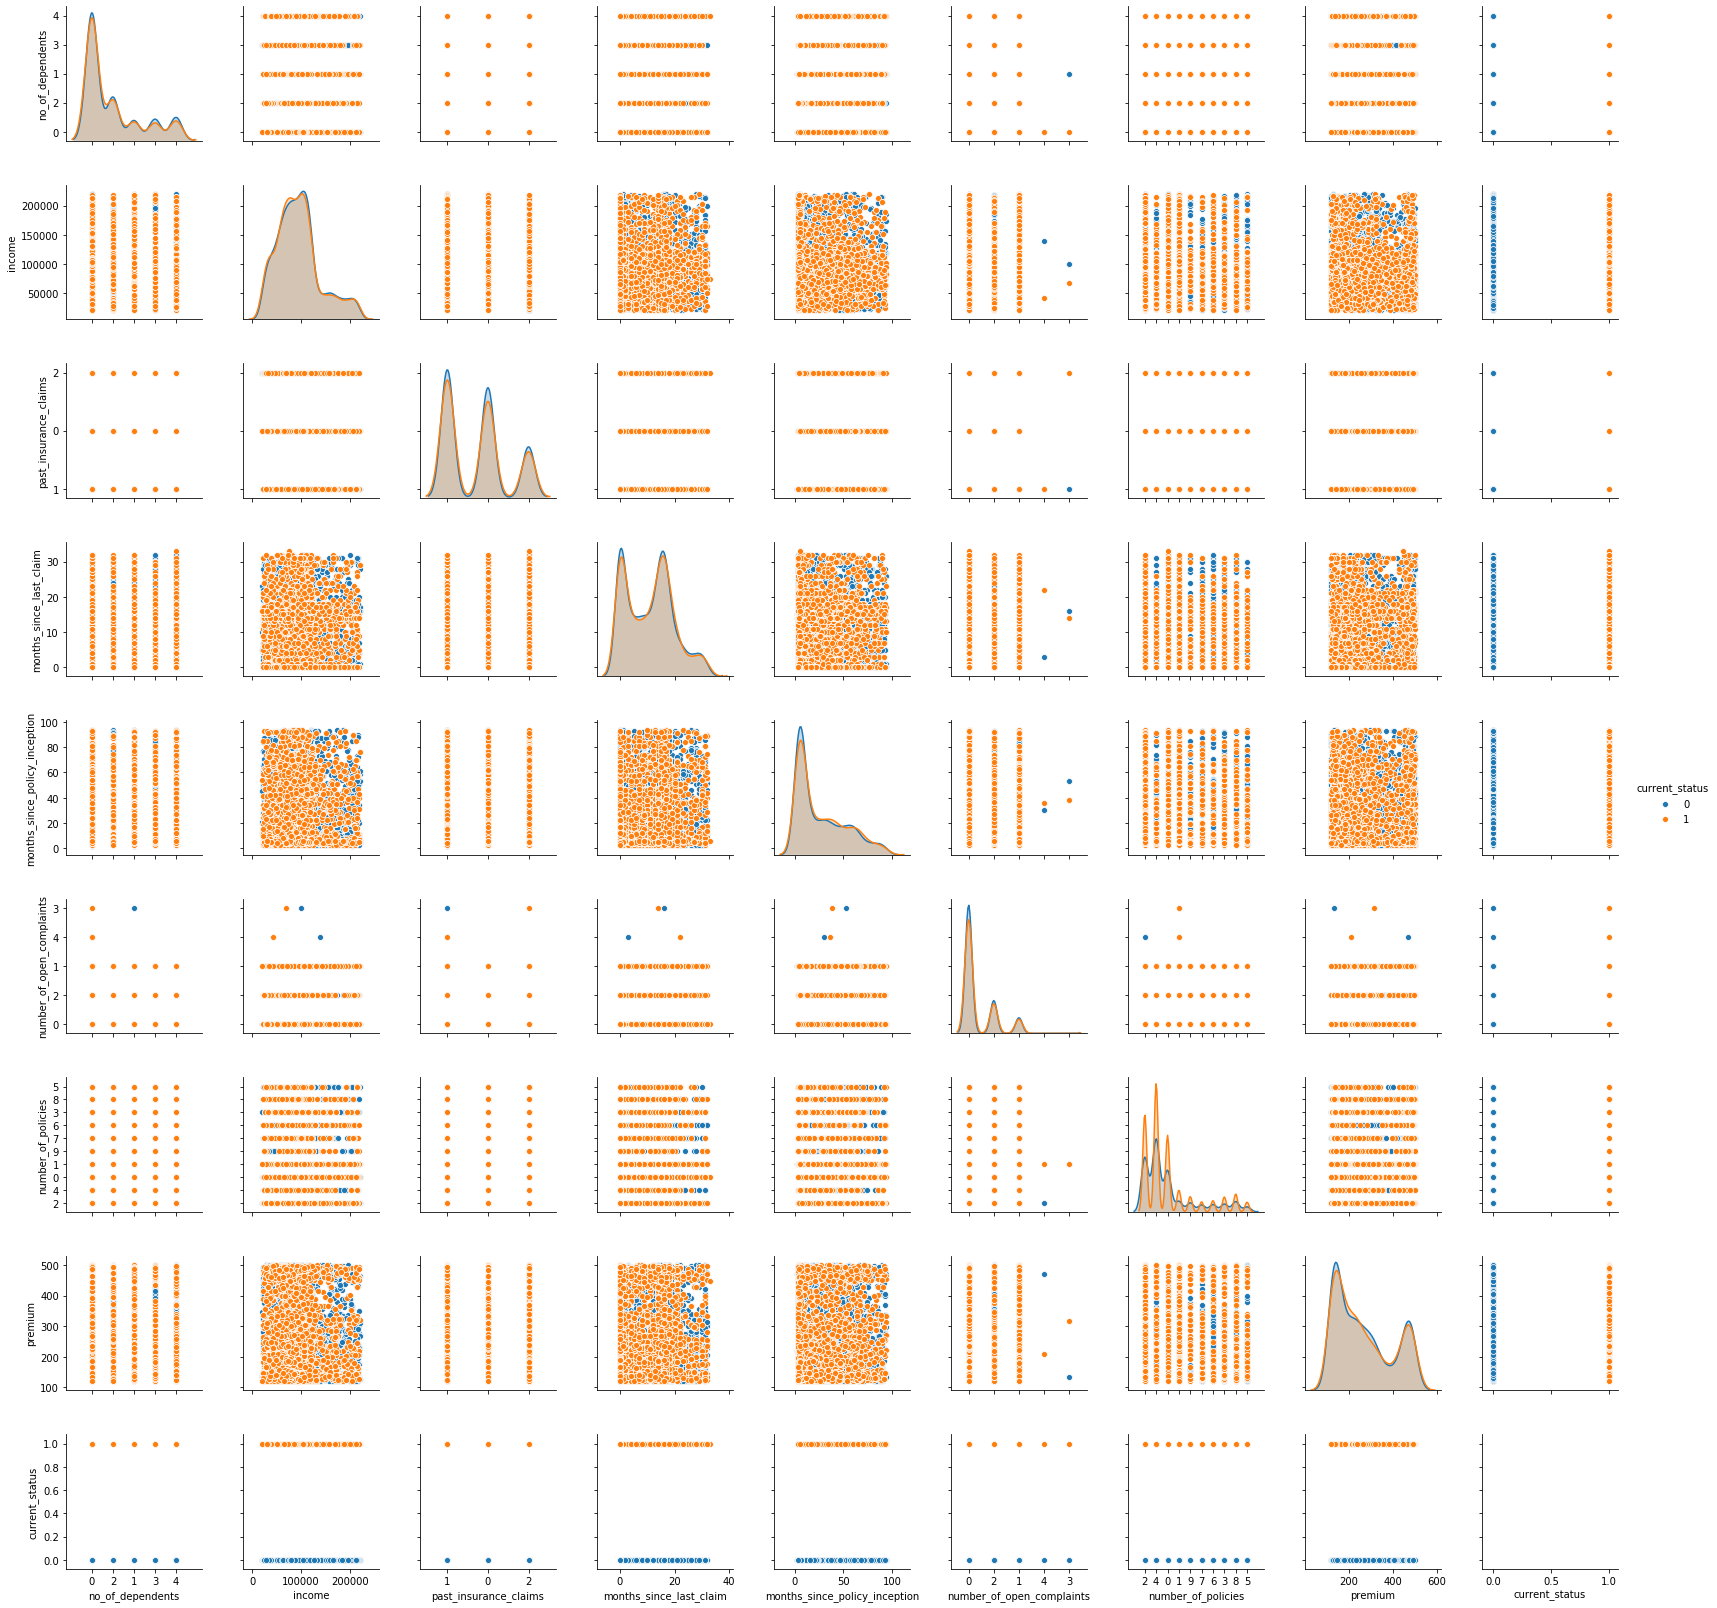

In [72]:
sb.pairplot(data,hue="current_status")

In [73]:

dummies = pd.get_dummies(data[[
    'marital_status', 
    'no_of_dependents', 
    'policy_issue_state', 
    'location',
    'gender', 
    'insured_education', 
    'insured_occupation',
    'coverage', 
    'past_insurance_claims',
    'previous_insurar', 
    'incident_type', 
    'policy_type',
    'number_of_open_complaints', 
    'number_of_policies',
    'vehicle_class',
    'vehicle_size',
    'sales_channel',
    'renew_offer_type']],drop_first=True)



In [74]:
dummies

,marital_status_married,marital_status_single,marital_status_unmarried,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,policy_issue_state_California,policy_issue_state_Nevada,policy_issue_state_Oregon,...,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,vehicle_class_two_door,vehicle_size_small,vehicle_size_suv,sales_channel_online,renew_offer_type_offer2
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4997,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
4998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [75]:
numeric=pd.DataFrame(data._get_numeric_data())


In [76]:
numeric=numeric.iloc[:,:-1]
numeric

,income,months_since_last_claim,months_since_policy_inception,premium
0,43958.028,9,11,274.19
1,165226.840,32,9,143.41
2,110685.503,4,21,187.96
3,167934.968,13,47,178.76
4,66192.293,24,22,132.01
...,...,...,...,...
4995,86875.533,21,4,139.13
4996,212441.437,0,16,145.65
4997,79622.286,10,93,218.66
4998,165751.739,0,47,235.14


In [77]:
updated = pd.concat([dummies,numeric], axis=1) 

In [78]:
updated

,marital_status_married,marital_status_single,marital_status_unmarried,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,policy_issue_state_California,policy_issue_state_Nevada,policy_issue_state_Oregon,...,number_of_policies_9,vehicle_class_two_door,vehicle_size_small,vehicle_size_suv,sales_channel_online,renew_offer_type_offer2,income,months_since_last_claim,months_since_policy_inception,premium
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,43958.028,9,11,274.19
1,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,1,0,165226.840,32,9,143.41
2,0,0,1,0,0,0,1,0,1,0,...,0,1,1,0,1,0,110685.503,4,21,187.96
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,167934.968,13,47,178.76
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,66192.293,24,22,132.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,86875.533,21,4,139.13
4996,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,212441.437,0,16,145.65
4997,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,79622.286,10,93,218.66
4998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,165751.739,0,47,235.14


In [79]:
updated.isna().sum()

marital_status_married                    0
marital_status_single                     0
marital_status_unmarried                  0
no_of_dependents_1                        0
no_of_dependents_2                        0
no_of_dependents_3                        0
no_of_dependents_4                        0
policy_issue_state_California             0
policy_issue_state_Nevada                 0
policy_issue_state_Oregon                 0
policy_issue_state_washington             0
location_rural                            0
location_suburban                         0
gender_m                                  0
insured_education_High School             0
insured_education_MD                      0
insured_education_Masters                 0
insured_education_PhD                     0
insured_education_associate               0
insured_occupation_doctor                 0
insured_occupation_exec-managerial        0
insured_occupation_other-service          0
insured_occupation_priv-house-se

In [80]:
dummies

,marital_status_married,marital_status_single,marital_status_unmarried,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,policy_issue_state_California,policy_issue_state_Nevada,policy_issue_state_Oregon,...,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,vehicle_class_two_door,vehicle_size_small,vehicle_size_suv,sales_channel_online,renew_offer_type_offer2
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4997,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
4998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [81]:
updated.columns

Index(['marital_status_married', 'marital_status_single',
       'marital_status_unmarried', 'no_of_dependents_1', 'no_of_dependents_2',
       'no_of_dependents_3', 'no_of_dependents_4',
       'policy_issue_state_California', 'policy_issue_state_Nevada',
       'policy_issue_state_Oregon', 'policy_issue_state_washington',
       'location_rural', 'location_suburban', 'gender_m',
       'insured_education_High School', 'insured_education_MD',
       'insured_education_Masters', 'insured_education_PhD',
       'insured_education_associate', 'insured_occupation_doctor',
       'insured_occupation_exec-managerial',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty', 'insured_occupation_sales',
       'insured_occupation_tech-support', 'coverage_extended',
       'coverage_premium', 'past_insurance_claims_1',
       'past_insurance_claims_2', 'previous_insurar_libertymutual',
       'previous_insurar_progressi

In [82]:

num=updated.iloc[:,-4:]

In [83]:
num

,income,months_since_last_claim,months_since_policy_inception,premium
0,43958.028,9,11,274.19
1,165226.840,32,9,143.41
2,110685.503,4,21,187.96
3,167934.968,13,47,178.76
4,66192.293,24,22,132.01
...,...,...,...,...
4995,86875.533,21,4,139.13
4996,212441.437,0,16,145.65
4997,79622.286,10,93,218.66
4998,165751.739,0,47,235.14


In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
num = scaler.fit_transform(num)


In [87]:
num=pd.DataFrame(num,columns=["income",'months_since_last_claim','months_since_policy_inception','premium'])

In [88]:
num

,income,months_since_last_claim,months_since_policy_inception,premium
0,0.115311,0.272727,0.097826,0.405818
1,0.725544,0.969697,0.076087,0.061524
2,0.451088,0.121212,0.206522,0.178807
3,0.739172,0.393939,0.489130,0.154587
4,0.227195,0.727273,0.217391,0.031512
...,...,...,...,...
4977,0.331275,0.636364,0.021739,0.050257
4978,0.963132,0.000000,0.152174,0.067421
4979,0.294776,0.303030,0.989130,0.259629
4980,0.728186,0.000000,0.489130,0.303014


In [89]:
dummies.shape

(4982, 55)

In [90]:
num.shape

(4982, 4)

In [102]:
inp = pd.concat([dummies,num], axis=1)

In [103]:
inp.shape

(4982, 59)

In [104]:
inp

,marital_status_married,marital_status_single,marital_status_unmarried,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,policy_issue_state_California,policy_issue_state_Nevada,policy_issue_state_Oregon,...,number_of_policies_9,vehicle_class_two_door,vehicle_size_small,vehicle_size_suv,sales_channel_online,renew_offer_type_offer2,income,months_since_last_claim,months_since_policy_inception,premium
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0.115311,0.272727,0.097826,0.405818
1,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0.725544,0.969697,0.076087,0.061524
2,0,0,1,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0.451088,0.121212,0.206522,0.178807
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.739172,0.393939,0.489130,0.154587
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0.227195,0.727273,0.217391,0.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0.331275,0.636364,0.021739,0.050257
4978,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.963132,0.000000,0.152174,0.067421
4979,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,0.294776,0.303030,0.989130,0.259629
4980,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.728186,0.000000,0.489130,0.303014


In [101]:
dummies.reset_index(drop=True, inplace=True)
num.reset_index(drop=True, inplace=True)

In [105]:
dummies.shape

(4982, 55)

In [106]:
numeric.iloc[:,-1]

0       274.19
1       143.41
2       187.96
3       178.76
4       132.01
         ...  
4995    139.13
4996    145.65
4997    218.66
4998    235.14
4999    321.34
Name: premium, Length: 4982, dtype: float64

In [107]:
target=data['current_status']


In [108]:
inp

,marital_status_married,marital_status_single,marital_status_unmarried,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,policy_issue_state_California,policy_issue_state_Nevada,policy_issue_state_Oregon,...,number_of_policies_9,vehicle_class_two_door,vehicle_size_small,vehicle_size_suv,sales_channel_online,renew_offer_type_offer2,income,months_since_last_claim,months_since_policy_inception,premium
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0.115311,0.272727,0.097826,0.405818
1,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0.725544,0.969697,0.076087,0.061524
2,0,0,1,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0.451088,0.121212,0.206522,0.178807
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.739172,0.393939,0.489130,0.154587
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0.227195,0.727273,0.217391,0.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0.331275,0.636364,0.021739,0.050257
4978,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.963132,0.000000,0.152174,0.067421
4979,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,0.294776,0.303030,0.989130,0.259629
4980,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.728186,0.000000,0.489130,0.303014


In [109]:
target

0       0
1       1
2       1
3       1
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: current_status, Length: 4982, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,target,test_size=0.20,random_state=20)

In [111]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [112]:
X_train.shape

(3985, 59)

In [113]:
X_test.shape

(997, 59)

In [114]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
y_predict_log = model_logr.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6238716148445336
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       624
           1       0.43      0.02      0.03       373

    accuracy                           0.62       997
   macro avg       0.53      0.50      0.40       997
weighted avg       0.55      0.62      0.49       997



In [117]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# from sklearn.model_selection import cross_val_score

# #create a new KNN model
# knn_cv = KNeighborsClassifier(n_neighbors=10)
# #train model with cv of 5 
# cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
# #print each cv score (accuracy) and average them
# print(cv_scores)
# print('cv_scores mean:{}'.format(np.mean(cv_scores)))

In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

print(classification_report(y_test,y_predict))

0.5997993981945837
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       624
           1       0.41      0.16      0.23       373

    accuracy                           0.60       997
   macro avg       0.52      0.51      0.48       997
weighted avg       0.55      0.60      0.54       997



In [ ]:
model.score(X_test, y_test)

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['entropy'],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[6,8,10,12]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                  

In [130]:
model_gridrf.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [131]:
y_predict_rtrain = model_gridrf.predict(X_train)

In [132]:
y_predict_rf = model_gridrf.predict(X_test)

In [133]:
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.6258776328986961
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       624
           1       0.00      0.00      0.00       373

    accuracy                           0.63       997
   macro avg       0.31      0.50      0.38       997
weighted avg       0.39      0.63      0.48       997



C:\Users\gagan.shetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
import xgboost

In [136]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [137]:
y_predict_xgb = model_xgb.predict(X_test)

In [138]:
confusion_matrix(y_test,y_predict_xgb)

array([[603,  21],
       [359,  14]], dtype=int64)

In [139]:
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.6188565697091274
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       624
           1       0.40      0.04      0.07       373

    accuracy                           0.62       997
   macro avg       0.51      0.50      0.41       997
weighted avg       0.54      0.62      0.50       997

